In [1]:
from genesis.version4 import Genesis4, Write
import genesis.version4 as g4
from genesis import tools
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


'''
This is a example to show a basic Genesis4 simulation with the LumeGenesis1.1.1

'''

'\nThis is a example to show a basic Genesis4 simulation with the LumeGenesis1.1.1\n\n'

In [2]:
run_file_location=os.path.expandvars('$LCLS_LATTICE/genesis/version4/cu_hxr/')
run_file=os.path.expandvars('cu_hxr.in')
Lattice_file=os.path.expandvars('hxr.lat')
workdir=os.path.expandvars('$SCRATCH')

In [3]:
### Genesis4 looks for additional files in the workdir, not the file location.
## We can get around this by copying the beam current and gamma to scratch. 
## We get around this by copying these to scratch

import shutil


shutil.copy(run_file_location +'beam_current.h5' , workdir)

shutil.copy(run_file_location +'beam_gamma.h5' , workdir)

'/sdf/scratch/users/j/jmorgan/beam_gamma.h5'

In [4]:
def runGenesis(run_file_location, run_file,Lattice_file, workdir, nproc=2):


    file=run_file_location + run_file
    
    G = Genesis4(file, lattice= run_file_location + Lattice_file, workdir=workdir, verbose = True)


    G.input.main.beam.alphax=1.0   #example in how to change the input file. 
    
    G.input.main.namelists.append(Write(field="end"))
    G.write_input(path=G.path, write_run_script=True)

    G.nproc = nproc

    G.mpi_run='salloc --partition milano --account ad:beamphysics --mem-per-cpu=4g -n {nproc} mpirun -n {nproc} {command_mpi}'

    G.run()
    
    return G

In [5]:
G=runGenesis(run_file_location, run_file,Lattice_file, workdir, nproc=20)

Configured to run in: /sdf/scratch/users/j/jmorgan/tmp9aq3madq
Setting use_mpi = True because nproc = 20
Running Genesis4 in /sdf/scratch/users/j/jmorgan/tmp9aq3madq
salloc --partition milano --account ad:beamphysics --mem-per-cpu=4g -n 20 mpirun -n 20 /sdf/home/j/jmorgan/conda/envs/Xopt/bin/genesis4 -l hxr.lat genesis4.in


salloc: Pending job allocation 55858492
salloc: job 55858492 queued and waiting for resources
salloc: job 55858492 has been allocated resources
salloc: Granted job allocation 55858492
salloc: Waiting for resource configuration
salloc: Nodes sdfmilan114 are ready for job


---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 20 13:12:20 2024

MPI-Comm Size: 20 nodes

Opened input file genesis4.in
Parsing lattice file hxr.lat ...
Setting up time window of 15.444 microns with 560 sample points...
Generating input radiation field for HARM = 1 ...
Adding profile with label: beamcurrent
Adding profile with label: beamgamma
Generating input particle distribution...

Running Core Simulation...
Time-dependent run with 560 slices for a time window of 15.444 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation: 20% done
  Calculation: 30% done
  Calculation: 40% done
  Calculation: 50% done
  Calculation: 60% done
  Calculation: 70% done
  Calculation: 80% done
  Calculation: 90% done
Calculation terminated due to requ

salloc: Relinquishing job allocation 55858492
salloc: Job allocation 55858492 has been revoked.


<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

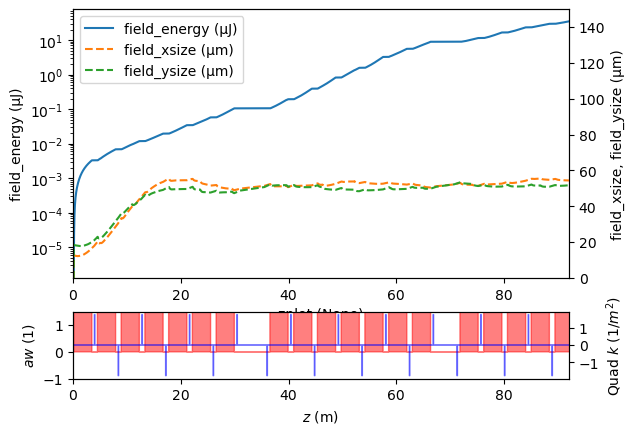

In [6]:
G.plot('field_energy', yscale='log', y2 = ['field_xsize', 'field_ysize'], ylim2=(0e-6, 150e-6))
